**Vamos experimentar agora o algoritmo Random Forest?**

Veja: Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.

In [23]:
!pip -q install yellowbrick
!pip install treeinterpreter
!pip install scikit-optimize

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.ensemble import RandomForestClassifier


In [25]:
import pickle
with open('Titanic/Titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [26]:
X_treino

,Embarked_C,Embarked_Q,Embarked_S,Pclass,Sex,Age,SibSp,Parch,Fare
331,0.0,0.0,1.0,1,1,45.5,0,0,28.5000
733,0.0,0.0,1.0,2,1,23.0,0,0,13.0000
382,0.0,0.0,1.0,3,1,32.0,0,0,7.9250
704,0.0,0.0,1.0,3,1,26.0,1,0,7.8542
813,0.0,0.0,1.0,3,0,6.0,4,2,31.2750
...,...,...,...,...,...,...,...,...,...
106,0.0,0.0,1.0,3,0,21.0,0,0,7.6500
270,0.0,0.0,1.0,1,1,28.0,0,0,31.0000
860,0.0,0.0,1.0,3,1,41.0,2,0,14.1083
435,0.0,0.0,1.0,1,0,14.0,1,2,120.0000


In [27]:
# modelo = RandomForestClassifier(n_estimators=80, max_features=3, criterion='gini', random_state = 42)
# modelo.fit(X_treino, y_treino)


search_space_rf = {
    'n_estimators': Integer(50, 200),        # Número de árvores na floresta
    'max_depth': Integer(2, 15),             # Profundidade máxima de cada árvore
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'criterion': Categorical(['gini', 'entropy'])
}

# 2. Configurar e executar a busca
bayes_search_rf = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=search_space_rf,
    n_iter=30,
    cv=10,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search_rf.fit(X_treino, y_treino)


Fitting 10 folds for each of 1 candidates, totalling 10 fits


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

,estimator,RandomForestC...ndom_state=42)
,search_spaces,"{'criterion': Categorical(c...), prior=None), 'max_depth': Integer(low=2...m='normalize'), 'min_samples_leaf': Integer(low=1...m='normalize'), 'min_samples_split': Integer(low=2...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,30
,scoring,None
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,10




> **Vamos testar o modelo?**



In [28]:
previsoes = bayes_search_rf.predict(X_teste)

In [29]:
previsoes

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])



> **Será se o modelo acertou?**



In [30]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8100558659217877

In [32]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[94, 11],
       [23, 51]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8100558659217877

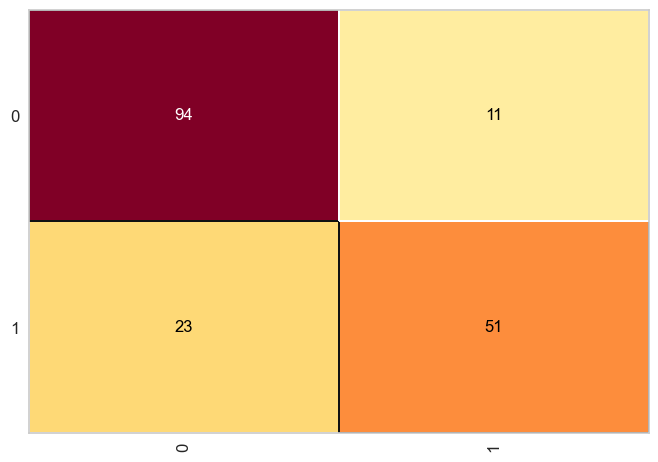

In [33]:
cm = ConfusionMatrix(bayes_search_rf)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [34]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



**Vamos ver os atributos que o Random considerou como mais importantes?**

In [36]:
# Obter a importância das features
importancias = bayes_search_rf.feature_importances_

# Pegando os nomes dos atributos
nomes_das_features = X_treino.columns

# Ordenar as features com base na importância
indices_ordenados = np.argsort(importancias)[::-1]

# Exibir as features mais importantes
print("Variáveis mais relevantes:")
for idx in indices_ordenados:
    print(f"{nomes_das_features[idx]}: {importancias[idx]}")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.barh(range(X_treino.shape[1]), importancias[indices_ordenados], align="center")
plt.yticks(range(X_treino.shape[1]), nomes_das_features[indices_ordenados])
plt.gca().invert_yaxis()  # Inverter o eixo y para que as features mais importantes fiquem no topo
plt.tight_layout()
plt.show()

AttributeError: 'BayesSearchCV' object has no attribute 'feature_importances_'